## Imports

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

## Carregando dados

In [2]:
traindf = pd.read_csv("/kaggle/input/titanic/train.csv")
testdf = pd.read_csv("/kaggle/input/titanic/test.csv")
data_cleaner = [traindf, testdf]

## Visualização

In [3]:
traindf.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testdf.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(traindf.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


### Features categóricas
- Categóricas: Survived, Sex, and Embarked. 
- Ordinais: Pclass.

### Features numéricas
- Continuas: Age, Fare. 
- Discretas: SibSp, Parch.

In [6]:
print("Tamanho teste: {}".format(testdf.shape))
print("Tamanho treino: {}".format(traindf.shape))

Tamanho teste: (418, 11)
Tamanho treino: (891, 12)


In [7]:
traindf.info()
print('_'*40)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [8]:
print('Train columns with null values:\n', traindf.isnull().sum())
print()
print('Train columns with null values:\n', testdf.isnull().sum())

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Train columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### Temos nulos nas colunas Age, Fare e Cabin
#### Para os nulos na coluna Age, vamos adicionar valores baseados na mediana

## Limpando, preenchendo dados

In [9]:
for dataset in data_cleaner:
    
    # Preenchemos nos nulos em idade com a mediana
    traindf['Age'].fillna(traindf['Age'].median(), inplace = True)
    testdf['Age'].fillna(testdf['Age'].median(), inplace = True)
    
    # Transformamos a coluna idade em int
    traindf['Age'] = traindf['Age'].astype(int)
    testdf['Age'] = testdf['Age'].astype(int)
    
    # Completamos embarcado com .mode
    traindf['Embarked'].fillna(traindf['Embarked'].mode()[0], inplace = True)
    testdf['Embarked'].fillna(testdf['Embarked'].mode()[0], inplace = True)
    
# Removemos passengerId, cabine e ticket do dataset
#drop_column = ['PassengerId','Cabin', 'Ticket']
#traindf.drop(drop_column, axis=1, inplace = True)

## Criando novas variáveis para nos ajudar realizar as analises

In [10]:
# Criamos uma nova variável tamanho da família
traindf['FamilySize'] = traindf['SibSp'] + traindf['Parch'] + 1
testdf['FamilySize'] = testdf['SibSp'] + testdf['Parch'] + 1

In [11]:
# Criamos variável isAlone, para saber se o passageiro se encontrava sozinho
traindf['IsAlone'] = 1
traindf['IsAlone'].loc[traindf['FamilySize'] > 1] = 0

testdf['IsAlone'] = 1
testdf['IsAlone'].loc[testdf['FamilySize'] > 1] = 0

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [12]:
# Tranformamos a variável categórica sexo para númerica
traindf['Sex'] = traindf['Sex'].replace(['female','male'],[0,1])
traindf

testdf['Sex'] = testdf['Sex'].replace(['female','male'],[0,1])
testdf

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,Q,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,NaN,S,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62,0,0,240276,9.6875,NaN,Q,1,1
3,895,3,"Wirz, Mr. Albert",1,27,0,0,315154,8.6625,NaN,S,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22,1,1,3101298,12.2875,NaN,S,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,27,0,0,A.5. 3236,8.0500,NaN,S,1,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39,0,0,PC 17758,108.9000,C105,C,1,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,1,1
416,1308,3,"Ware, Mr. Frederick",1,27,0,0,359309,8.0500,NaN,S,1,1


In [13]:
# Transformamos a variável idade em 4 bandas de idade
# < 16 = 0
# <= 48 = 2
# <= 64 = 3
# > 64 = 4

traindf['Age_band']=0
traindf.loc[traindf['Age']<=16,'Age_band']=0
traindf.loc[(traindf['Age']>32)&(traindf['Age']<=48),'Age_band']=2
traindf.loc[(traindf['Age']>48)&(traindf['Age']<=64),'Age_band']=3
traindf.loc[traindf['Age']>64,'Age_band']=4
traindf.head(2)

testdf['Age_band']=0
testdf.loc[testdf['Age']<=16,'Age_band']=0
testdf.loc[(testdf['Age']>32)&(testdf['Age']<=48),'Age_band']=2
testdf.loc[(testdf['Age']>48)&(testdf['Age']<=64),'Age_band']=3
testdf.loc[testdf['Age']>64,'Age_band']=4
testdf.head(2)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Age_band
0,892,3,"Kelly, Mr. James",1,34,0,0,330911,7.8292,NaN,Q,1,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47,1,0,363272,7.0000,NaN,S,2,0,2


## Análisando os dados

#### Taxa de sobrevivencia por sexo (0 = mulher, 1 = homem)

In [14]:
traindf[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Sex', ascending=True)


,Sex,Survived
0,0,0.742038
1,1,0.188908


Podemos observar que as mulheres tiveram prioridade na evacuação, o que levou a uma grande taxa de sobrevivência para o sexo feminino (74%).

#### Taxa de sobrevivencia por idade

In [15]:
traindf['AgeBand'] = pd.cut(traindf['Age'], 5)
traindf[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

testdf['AgeBand'] = pd.cut(traindf['Age'], 5)

Podemos observar que, passageiros até 16 anos tiveram a maior taxa de sobrevivência (55%). Jovens adultos tiveram as menores taxas de sobrevivencia (34%). Senhores(as) de idade, tiveram uma taxa alta de sobrevivência (43%).

#### Taxa de sobrevivencia por classe (quanto menor, melhor a classe, maior valor pago)

In [16]:
traindf[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Pclass', ascending=True)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Observamos que quanto maior a classe, maior foi a taxa de sobrevivência.

#### Taxa de sobrevivencia por tamanho da família

In [17]:
traindf[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=True)

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


#### Taxa de sobrevivencia acompanhado e sozinho (0 = acompanhado, 1 = sozinho)

In [18]:
traindf[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean().sort_values(by='IsAlone', ascending=True)

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Pessoas acompanhadas tiveram a taxa de sobrevivência maior do que as que estavam sozinhas

In [19]:
traindf[['Age_band', 'Survived']].groupby(['Age_band'], as_index=False).mean().sort_values(by='Age_band', ascending=True)

,Age_band,Survived
0,0,0.377600
1,2,0.403226
2,3,0.434783
3,4,0.090909


Passageiros de 48 a 64 anos tiveram a maior taxa de sobrevivência


In [20]:
# Removemos as colunas desnecessárias para aplicação o modelo de ML.
traindf2 = traindf.drop(['Ticket', 'Cabin', 'Name','Embarked', 'AgeBand'], axis=1)
traindf2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,1,0,3,1,22,1,0,7.2500,2,0,0
1,2,1,1,0,38,1,0,71.2833,2,0,2
2,3,1,3,0,26,0,0,7.9250,1,1,0
3,4,1,1,0,35,1,0,53.1000,2,0,2
4,5,0,3,1,35,0,0,8.0500,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,1,1,0
887,888,1,1,0,19,0,0,30.0000,1,1,0
888,889,0,3,0,28,1,2,23.4500,4,0,0
889,890,1,1,1,26,0,0,30.0000,1,1,0


In [21]:
testdf2 = testdf.drop(['Ticket', 'Cabin', 'Name','Embarked','AgeBand'], axis=1)
testdf2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,892,3,1,34,0,0,7.8292,1,1,2
1,893,3,0,47,1,0,7.0000,2,0,2
2,894,2,1,62,0,0,9.6875,1,1,3
3,895,3,1,27,0,0,8.6625,1,1,0
4,896,3,0,22,1,1,12.2875,3,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27,0,0,8.0500,1,1,0
414,1306,1,0,39,0,0,108.9000,1,1,2
415,1307,3,1,38,0,0,7.2500,1,1,2
416,1308,3,1,27,0,0,8.0500,1,1,0


In [22]:
testdf2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,892,3,1,34,0,0,7.8292,1,1,2
1,893,3,0,47,1,0,7.0000,2,0,2
2,894,2,1,62,0,0,9.6875,1,1,3
3,895,3,1,27,0,0,8.6625,1,1,0
4,896,3,0,22,1,1,12.2875,3,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27,0,0,8.0500,1,1,0
414,1306,1,0,39,0,0,108.9000,1,1,2
415,1307,3,1,38,0,0,7.2500,1,1,2
416,1308,3,1,27,0,0,8.0500,1,1,0


<AxesSubplot:>

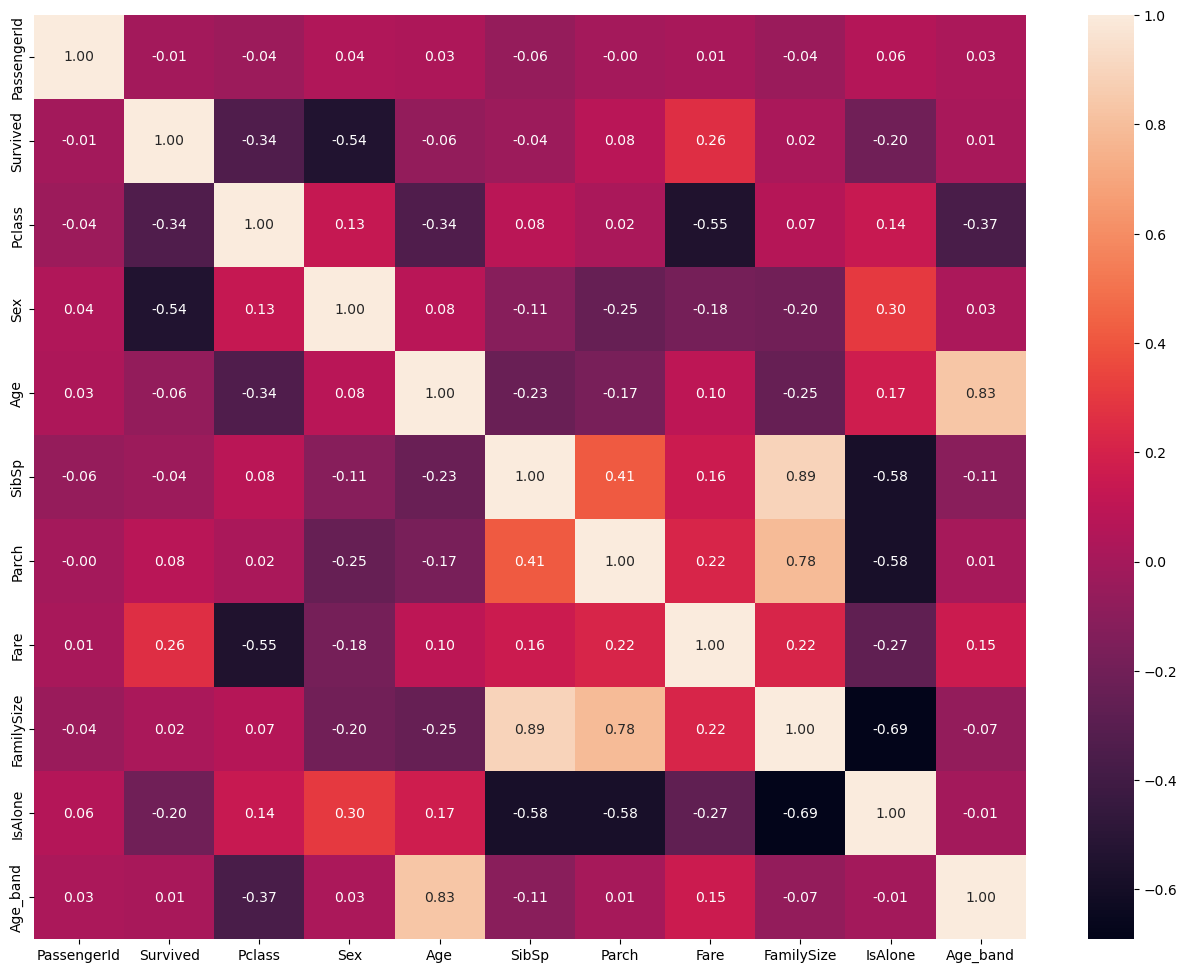

In [23]:
plt.figure(figsize=(16,12))
sns.heatmap(traindf.corr(),annot=True,fmt=".2f")

Text(0.5, 1.0, 'Não Sobreviventes x Sobreviventes')

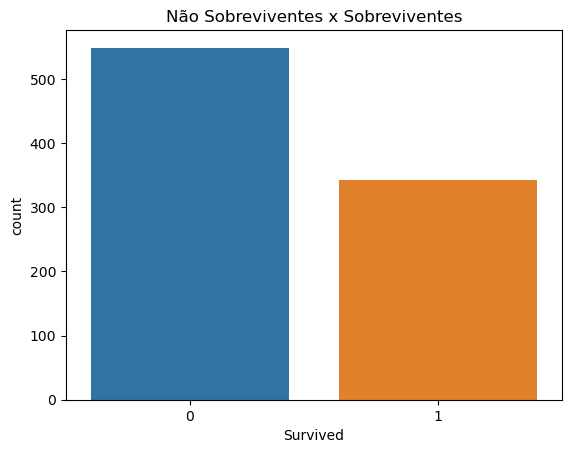

In [24]:

ax = sns.countplot(x='Survived', data = traindf)
ax.set_title('Não Sobreviventes x Sobreviventes')

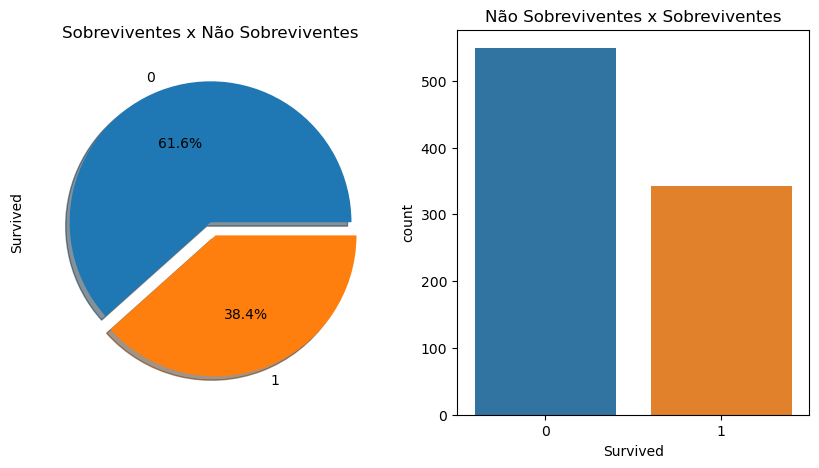

In [25]:
f,ax = plt.subplots(1,2,figsize=(10,5))

traindf['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Sobreviventes x Não Sobreviventes')

sns.countplot(data=traindf, x = traindf['Survived'], ax=ax[1])
ax[1].set_title('Não Sobreviventes x Sobreviventes')

plt.show()

In [26]:
incidentes = traindf['Survived'].value_counts()
incidentes

0    549
1    342
Name: Survived, dtype: int64

#### Analisando o dataset treino, podemos observar que: **38.4%** sobreviveram, e **61.6%** não sobreviveram
#### Dos 891 registros no dataset de treino, em torno de apenas **350** pessoas sobreviveram e mais de **500** não sobreviveram

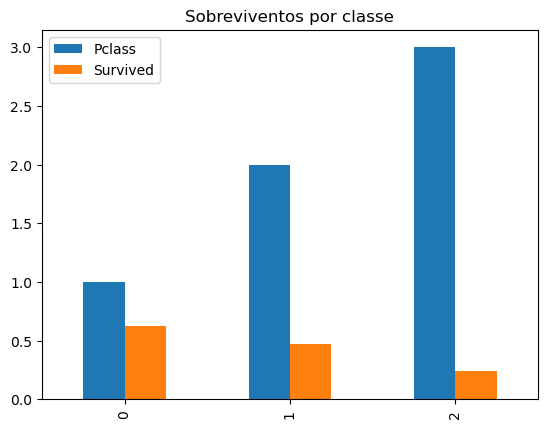

In [27]:
f, ax = plt.subplots()
traindf[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().plot(ax=ax, kind='bar')
ax.set_title('Sobreviventos por classe')

plt.show()

In [28]:
testdf2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,892,3,1,34,0,0,7.8292,1,1,2
1,893,3,0,47,1,0,7.0000,2,0,2
2,894,2,1,62,0,0,9.6875,1,1,3
3,895,3,1,27,0,0,8.6625,1,1,0
4,896,3,0,22,1,1,12.2875,3,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27,0,0,8.0500,1,1,0
414,1306,1,0,39,0,0,108.9000,1,1,2
415,1307,3,1,38,0,0,7.2500,1,1,2
416,1308,3,1,27,0,0,8.0500,1,1,0


In [29]:
traindf2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,1,0,3,1,22,1,0,7.2500,2,0,0
1,2,1,1,0,38,1,0,71.2833,2,0,2
2,3,1,3,0,26,0,0,7.9250,1,1,0
3,4,1,1,0,35,1,0,53.1000,2,0,2
4,5,0,3,1,35,0,0,8.0500,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27,0,0,13.0000,1,1,0
887,888,1,1,0,19,0,0,30.0000,1,1,0
888,889,0,3,0,28,1,2,23.4500,4,0,0
889,890,1,1,1,26,0,0,30.0000,1,1,0


In [30]:
testdf2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,892,3,1,34,0,0,7.8292,1,1,2
1,893,3,0,47,1,0,7.0000,2,0,2
2,894,2,1,62,0,0,9.6875,1,1,3
3,895,3,1,27,0,0,8.6625,1,1,0
4,896,3,0,22,1,1,12.2875,3,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27,0,0,8.0500,1,1,0
414,1306,1,0,39,0,0,108.9000,1,1,2
415,1307,3,1,38,0,0,7.2500,1,1,2
416,1308,3,1,27,0,0,8.0500,1,1,0


In [31]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [32]:
testdf2['Fare'].fillna(testdf2['Fare'].dropna().median(), inplace=True)
traindf2['Fare'].fillna(traindf2['Fare'].dropna().median(), inplace=True)

In [33]:
testdf2.loc[ testdf2['Fare'] <= 7.91, 'Fare'] = 0
testdf2.loc[(testdf2['Fare'] > 7.91) & (testdf2['Fare'] <= 14.454), 'Fare'] = 1
testdf2.loc[(testdf2['Fare'] > 14.454) & (testdf2['Fare'] <= 31), 'Fare']   = 2
testdf2.loc[ testdf2['Fare'] > 31, 'Fare'] = 3
testdf2['Fare'] = testdf2['Fare'].astype(int)



In [34]:
traindf2.loc[ traindf2['Fare'] <= 7.91, 'Fare'] = 0
traindf2.loc[(traindf2['Fare'] > 7.91) & (traindf2['Fare'] <= 14.454), 'Fare'] = 1
traindf2.loc[(traindf2['Fare'] > 14.454) & (traindf2['Fare'] <= 31), 'Fare']   = 2
traindf2.loc[ traindf2['Fare'] > 31, 'Fare'] = 3
traindf2['Fare'] = traindf2['Fare'].astype(int)

In [35]:
traindf2.info()
print('_'*40)
testdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  891 non-null    int64
 1   Survived     891 non-null    int64
 2   Pclass       891 non-null    int64
 3   Sex          891 non-null    int64
 4   Age          891 non-null    int64
 5   SibSp        891 non-null    int64
 6   Parch        891 non-null    int64
 7   Fare         891 non-null    int64
 8   FamilySize   891 non-null    int64
 9   IsAlone      891 non-null    int64
 10  Age_band     891 non-null    int64
dtypes: int64(11)
memory usage: 76.7 KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-nul

In [36]:
#traindf2 = traindf2.drop("PassengerId", axis=1)
traindf2.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,1,0,3,1,22,1,0,0,2,0,0
1,2,1,1,0,38,1,0,3,2,0,2
2,3,1,3,0,26,0,0,1,1,1,0
3,4,1,1,0,35,1,0,3,2,0,2
4,5,0,3,1,35,0,0,1,1,1,2


In [37]:
testdf2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,892,3,1,34,0,0,0,1,1,2
1,893,3,0,47,1,0,0,2,0,2
2,894,2,1,62,0,0,1,1,1,3
3,895,3,1,27,0,0,1,1,1,0
4,896,3,0,22,1,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,27,0,0,1,1,1,0
414,1306,1,0,39,0,0,3,1,1,2
415,1307,3,1,38,0,0,0,1,1,2
416,1308,3,1,27,0,0,1,1,1,0


In [38]:
X_train = traindf2.drop(["Survived", 'PassengerId'], axis=1)
Y_train = traindf2["Survived"]
X_test  = testdf2.drop("PassengerId", axis=1).copy()

In [39]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,3,1,34,0,0,0,1,1,2
1,3,0,47,1,0,0,2,0,2
2,2,1,62,0,0,1,1,1,3
3,3,1,27,0,0,1,1,1,0
4,3,0,22,1,1,1,3,0,0
...,...,...,...,...,...,...,...,...,...
413,3,1,27,0,0,1,1,1,0
414,1,0,39,0,0,3,1,1,2
415,3,1,38,0,0,0,1,1,2
416,3,1,27,0,0,1,1,1,0


In [40]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,Age_band
0,3,1,22,1,0,0,2,0,0
1,1,0,38,1,0,3,2,0,2
2,3,0,26,0,0,1,1,1,0
3,1,0,35,1,0,3,2,0,2
4,3,1,35,0,0,1,1,1,2
...,...,...,...,...,...,...,...,...,...
886,2,1,27,0,0,1,1,1,0
887,1,0,19,0,0,2,1,1,0
888,3,0,28,1,2,2,4,0,0
889,1,1,26,0,0,2,1,1,0


In [41]:
X_train.shape, Y_train.shape, X_test.shape

((891, 9), (891,), (418, 9))

In [42]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


80.92

In [43]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

64.98

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

87.43

In [45]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.78

In [46]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

76.32

In [47]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


79.8

In [48]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.83

In [49]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

93.71

In [50]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

93.71

In [51]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,93.71
8,Decision Tree,93.71
1,KNN,87.43
2,Logistic Regression,80.92
7,Linear SVC,79.80
4,Naive Bayes,77.78
5,Perceptron,76.32
6,Stochastic Gradient Decent,71.83
0,Support Vector Machines,64.98


In [52]:
Y_pred = random_forest.predict(X_test)
submission = pd.DataFrame({
        "PassengerId": testdf2["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv("../working/submit3.csv", index=False)